In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = "E:/Analytics Vidhya/McKinsey Hack/"

In [273]:
atm_info = pd.read_csv(path+"ATM_Info.csv")
replenishment_sample = pd.read_csv(path+"Replenishment.csv")
withdrawal_sample = pd.read_csv(path+"Withdrawal.csv")

train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test_QOB4NUk.csv")
atm_info.dtypes

ATM_ID      object
Facility    object
Type        object
dtype: object

In [274]:
train.Date = pd.to_datetime(train.Date,format="%d-%b-%y")
train = train[train.Date > pd.to_datetime('11-1-2013')]


withdrawal_sample.DATE = pd.to_datetime(withdrawal_sample.DATE,format="%d-%b-%y")


In [275]:
train.head()

,ID,ATM_ID,Date,Withdrawal,Balance
1015,SRNO00279_41580,SRNO00279,2013-11-02,14845,95773
1016,SRNO00279_41581,SRNO00279,2013-11-03,17731,78042
1017,SRNO00279_41582,SRNO00279,2013-11-04,5021,73021
1018,SRNO00279_41583,SRNO00279,2013-11-05,11264,31666
1019,SRNO00279_41584,SRNO00279,2013-11-06,6764,24902


In [276]:
withdrawal_sample.columns = ['ID', 'ATM_ID', 'Date', 'Withdrawal']

In [277]:
withdrawal_sample.shape

(14849, 4)

In [278]:
replenishment_sample.head()

,ATM_ID,Replenishment frequency,Replenishment amount
0,SRNO43630,NaN,NaN
1,SRNO91060,NaN,NaN
2,SRNO26423,NaN,NaN
3,SRNO54248,NaN,NaN
4,SRNO27156,NaN,NaN


In [279]:
len(train)

76108

In [280]:
test.head()

,ATM_ID
0,SRNO86083
1,SRNO86102
2,SRNO57193
3,SRNO28383
4,SRNO73775


In [281]:
#test = pd.merge(test,train[[]],on="ATM_ID",how='right')
all_w=train.append(withdrawal_sample)

In [282]:
#all_w=all_w.merge(atm_info,on="ATM_ID",how='left')
atm_info.head()

,ATM_ID,Facility,Type
0,SRNO43630,Only ATM,City
1,SRNO91060,Only ATM,City
2,SRNO26423,Only ATM,Rural
3,SRNO54248,Only ATM,Rural
4,SRNO27156,Only ATM,Rural


In [283]:
all_w.dtypes

ATM_ID                object
Balance              float64
Date          datetime64[ns]
ID                    object
Withdrawal           float64
dtype: object

In [284]:
test.head()

,ATM_ID
0,SRNO86083
1,SRNO86102
2,SRNO57193
3,SRNO28383
4,SRNO73775


In [285]:
all_w.head()

,ATM_ID,Balance,Date,ID,Withdrawal
1015,SRNO00279,95773.0,2013-11-02,SRNO00279_41580,14845.0
1016,SRNO00279,78042.0,2013-11-03,SRNO00279_41581,17731.0
1017,SRNO00279,73021.0,2013-11-04,SRNO00279_41582,5021.0
1018,SRNO00279,31666.0,2013-11-05,SRNO00279_41583,11264.0
1019,SRNO00279,24902.0,2013-11-06,SRNO00279_41584,6764.0


In [286]:
all_w.tail()

,ATM_ID,Balance,Date,ID,Withdrawal
14844,SRNO99994,NaN,2014-05-27,SRNO99994_41786,NaN
14845,SRNO99994,NaN,2014-05-28,SRNO99994_41787,NaN
14846,SRNO99994,NaN,2014-05-29,SRNO99994_41788,NaN
14847,SRNO99994,NaN,2014-05-30,SRNO99994_41789,NaN
14848,SRNO99994,NaN,2014-05-31,SRNO99994_41790,NaN


In [287]:
atm_wise_withdrawal_m = all_w.groupby('ATM_ID',as_index=False).Withdrawal.mean()
atm_wise_withdrawal_m.columns = ['ATM_ID', 'W_mean']
all_w=all_w.merge(atm_wise_withdrawal_m,on='ATM_ID',how='left')

atm_wise_withdrawal_med = all_w.groupby('ATM_ID',as_index=False).Withdrawal.median()
atm_wise_withdrawal_med.columns = ['ATM_ID', 'W_median']
all_w=all_w.merge(atm_wise_withdrawal_med,on='ATM_ID',how='left')

atm_wise_withdrawal_max = all_w.groupby('ATM_ID',as_index=False).Withdrawal.max()
atm_wise_withdrawal_max.columns = ['ATM_ID', 'W_max']
all_w=all_w.merge(atm_wise_withdrawal_max,on='ATM_ID',how='left')

atm_wise_withdrawal_min = all_w.groupby('ATM_ID',as_index=False).Withdrawal.min()
atm_wise_withdrawal_min.columns = ['ATM_ID', 'W_min']
all_w=all_w.merge(atm_wise_withdrawal_min,on='ATM_ID',how='left')

#atm_wise_withdrawal_std = all_w.groupby('ATM_ID').Withdrawal.apply(lambda x: x.std())
#atm_wise_withdrawal_std.columns = ['ATM_ID', 'W_std']
#all_w=all_w.merge(atm_wise_withdrawal_std,on='ATM_ID',how='left')


all_w['Diff1'] = all_w['W_mean']-all_w['W_median']
all_w['Diff2'] = all_w['W_max']-all_w['W_min']



#summary_w=all_w.groupby('ATM_ID',as_index=False).Withdrawal.agg([np.max, np.min, np.mean, np.std])

all_w.head(10)


,ATM_ID,Balance,Date,ID,Withdrawal,W_mean,W_median,W_max,W_min,Diff1,Diff2
0,SRNO00279,95773.0,2013-11-02,SRNO00279_41580,14845.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
1,SRNO00279,78042.0,2013-11-03,SRNO00279_41581,17731.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
2,SRNO00279,73021.0,2013-11-04,SRNO00279_41582,5021.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
3,SRNO00279,31666.0,2013-11-05,SRNO00279_41583,11264.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
4,SRNO00279,24902.0,2013-11-06,SRNO00279_41584,6764.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
5,SRNO00279,46795.0,2013-11-07,SRNO00279_41585,5359.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
6,SRNO00279,30991.0,2013-11-08,SRNO00279_41586,15805.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
7,SRNO00279,20500.0,2013-11-09,SRNO00279_41587,10490.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
8,SRNO00279,9587.0,2013-11-10,SRNO00279_41588,10913.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0
9,SRNO00279,25689.0,2013-11-11,SRNO00279_41589,8526.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,43375.0


In [288]:
all_w['Wid_31']=all_w.groupby('ATM_ID')['Withdrawal'].shift(31)
all_w['Wid_35']=all_w.groupby('ATM_ID')['Withdrawal'].shift(35)
all_w['Wid_40']=all_w.groupby('ATM_ID')['Withdrawal'].shift(40)
all_w['Wid_45']=all_w.groupby('ATM_ID')['Withdrawal'].shift(45)
all_w['Wid_50']=all_w.groupby('ATM_ID')['Withdrawal'].shift(50)
all_w['Wid_55']=all_w.groupby('ATM_ID')['Withdrawal'].shift(55)
all_w['Wid_60']=all_w.groupby('ATM_ID')['Withdrawal'].shift(60)

all_w.describe()

E:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Balance,Withdrawal,W_mean,W_median,W_max,W_min,Diff1,Diff2,Wid_31,Wid_35,Wid_40,Wid_45,Wid_50,Wid_55,Wid_60
count,76108.000000,76108.000000,90957.000000,90957.000000,90957.000000,90957.000000,90957.000000,90957.000000,76108.000000,74192.000000,71800.000000,69410.000000,67020.000000,64630.000000,62240.000000
mean,41207.330268,11939.305986,11929.081378,10791.913635,42193.672351,678.402047,1137.167743,41515.270304,11939.305986,11798.589430,11749.156978,11852.152788,11977.799299,12000.125468,11846.257600
std,32627.123722,15076.792780,12004.610504,11511.069216,36307.821739,2329.607399,1480.829612,35432.263202,15076.792780,14862.375299,14762.730484,14847.084657,14911.001352,14921.791390,14753.363826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2142.368750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,5048.037500,4226.500000,20166.000000,0.000000,407.537500,19746.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8828.968750,7910.500000,32898.000000,0.000000,771.225000,32175.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,15186.718750,14017.500000,54210.000000,382.000000,1356.643750,53064.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,203647.000000,279791.000000,130708.650000,129092.500000,279791.000000,38187.000000,11573.750000,241604.000000,279791.000000,279791.000000,279791.000000,279791.000000,279791.000000,279791.000000,279791.000000


In [289]:
#all['Bal_RM3']=all['Balance'].rolling(40).mean() 
#all['Bal_RM5']=all['Balance'].rolling(5).mean() 
#all['Bal_RM10']=all['Balance'].rolling(10).mean() 
#all['Bal_RM20']=all['Balance'].rolling(20).mean() 
#all['Bal_RM3']=all.groupby('ATM_ID')['Balance'].apply(lambda x: x.shift(1).rolling(3).sum()) 
#all['Bal_RM5']=all.groupby('ATM_ID')['Balance'].apply(lambda x: x.shift(1).rolling(5).sum()) 
#all['Bal_RM10']=all.groupby('ATM_ID')['Balance'].apply(lambda x: x.shift(1).rolling(10).sum()) 
#all['Bal_RM20']=all.groupby('ATM_ID')['Balance'].apply(lambda x: x.shift(1).rolling(20).sum()) 

#all['Wid_RM5']=all['Withdrawal'].rolling(5).mean() 
#all['Wid_RM10']=all['Withdrawal'].rolling(10).mean() 
#all['Wid_RM20']=all['Withdrawal'].rolling(20).mean() 
#all['wid_RM3']=all.groupby('ATM_ID')['Withdrawal'].apply(lambda x: x.shift(1).rolling(3).sum()) 
#all['wid_RM5']=all.groupby('ATM_ID')['Withdrawal'].apply(lambda x: x.shift(1).rolling(5).sum()) 
#all['wid_RM10']=all.groupby('ATM_ID')['Withdrawal'].apply(lambda x: x.shift(1).rolling(10).sum()) 
#all['wid_RM20']=all.groupby('ATM_ID')['Withdrawal'].apply(lambda x: x.shift(1).rolling(20).sum()) 


In [290]:
all_w['day']=all_w.Date.apply(lambda x: x.day)
all_w['month']=all_w.Date.apply(lambda x: x.month)
all_w['year']=all_w.Date.apply(lambda x: x.year)
all_w['weekday']=all_w.Date.apply(lambda x: x.weekday())
all_w['day_of_year']=all_w['month']*30+all_w['day']


all_w.dtypes

ATM_ID                 object
Balance               float64
Date           datetime64[ns]
ID                     object
Withdrawal            float64
W_mean                float64
W_median              float64
W_max                 float64
W_min                 float64
Diff1                 float64
Diff2                 float64
Wid_31                float64
Wid_35                float64
Wid_40                float64
Wid_45                float64
Wid_50                float64
Wid_55                float64
Wid_60                float64
day                     int64
month                   int64
year                    int64
weekday                 int64
day_of_year             int64
dtype: object

In [291]:


dum=pd.get_dummies(atm_info[['Facility','Type']])
dum['ATM_ID']=atm_info['ATM_ID']
all_w=all_w.merge(dum,on='ATM_ID',how='left')

all_w.head()

,ATM_ID,Balance,Date,ID,Withdrawal,W_mean,W_median,W_max,W_min,Diff1,...,day,month,year,weekday,day_of_year,Facility_Additional services,Facility_Only ATM,Type_City,Type_Rural,Type_Unknown
0,SRNO00279,95773.0,2013-11-02,SRNO00279_41580,14845.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,...,2,11,2013,5,332,0.0,1.0,0.0,1.0,0.0
1,SRNO00279,78042.0,2013-11-03,SRNO00279_41581,17731.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,...,3,11,2013,6,333,0.0,1.0,0.0,1.0,0.0
2,SRNO00279,73021.0,2013-11-04,SRNO00279_41582,5021.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,...,4,11,2013,0,334,0.0,1.0,0.0,1.0,0.0
3,SRNO00279,31666.0,2013-11-05,SRNO00279_41583,11264.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,...,5,11,2013,1,335,0.0,1.0,0.0,1.0,0.0
4,SRNO00279,24902.0,2013-11-06,SRNO00279_41584,6764.0,10983.01875,9751.5,46372.0,2997.0,1231.51875,...,6,11,2013,2,336,0.0,1.0,0.0,1.0,0.0


In [292]:
#all_w.fillna(method='bfill',inplace=True)
#all_w.fillna(method='ffill',inplace=True)
all_w.fillna(all_w.mean(axis=0),inplace=True)
all_w.columns

Index(['ATM_ID', 'Balance', 'Date', 'ID', 'Withdrawal', 'W_mean', 'W_median',
       'W_max', 'W_min', 'Diff1', 'Diff2', 'Wid_31', 'Wid_35', 'Wid_40',
       'Wid_45', 'Wid_50', 'Wid_55', 'Wid_60', 'day', 'month', 'year',
       'weekday', 'day_of_year', 'Facility_Additional services',
       'Facility_Only ATM', 'Type_City', 'Type_Rural', 'Type_Unknown'],
      dtype='object')

In [293]:
cols = ['Balance',
 'Wid_31',
 'Wid_35',
 'Wid_40',
 'Wid_45',
 'Wid_50',
 'Wid_55',
 'Wid_60']
cols

['Balance',
 'Wid_31',
 'Wid_35',
 'Wid_40',
 'Wid_45',
 'Wid_50',
 'Wid_55',
 'Wid_60']

In [223]:
#all_w[cols] = all_w.groupby('ATM_ID')[cols].transform(lambda x: (x - x.mean()) / x.std())

In [328]:
all_w.fillna(all_w.mean(axis=0),inplace=True)

#trainSet_w = all_w[(all_w.Date>pd.to_datetime('12-1-2013')) & (all_w.Date<pd.to_datetime('4-1-2014'))]
#testSet_w = all_w[(all_w.Date>pd.to_datetime('4-1-2014')) & (all_w.Date<pd.to_datetime('5-1-2014'))]
trainSet_w = all_w[(all_w.Date>pd.to_datetime('12-1-2013')) & (all_w.Date<pd.to_datetime('4-1-2014'))]
testSet_w = all_w[(all_w.Date>=pd.to_datetime('4-1-2014')) & (all_w.Date<pd.to_datetime('5-1-2014'))]


train_w = all_w[(all_w.Date>pd.to_datetime('1-1-2014')) & (all_w.Date<pd.to_datetime('5-1-2014'))]
test_w = all_w[all_w.Date>=pd.to_datetime('5-1-2014')]



In [330]:
trainSet_w.describe()

,Balance,Withdrawal,W_mean,W_median,W_max,W_min,Diff1,Diff2,Wid_31,Wid_35,...,day,month,year,weekday,day_of_year,Facility_Additional services,Facility_Only ATM,Type_City,Type_Rural,Type_Unknown
count,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,...,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000,49026.000000
mean,41031.454045,11919.586158,11934.311483,10796.518266,42212.117529,678.735671,1137.793218,41533.381859,11497.477813,11564.597988,...,15.268266,4.753213,2013.719945,2.990148,157.864643,0.088239,0.911761,0.245808,0.661771,0.092420
std,32964.899914,15014.621369,12005.146555,11511.896368,36306.657593,2330.142520,1480.879755,35430.976190,14177.044040,13972.283014,...,8.722382,4.571876,0.449031,2.016668,137.966181,0.283645,0.283645,0.430570,0.473112,0.289621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2142.368750,0.000000,0.000000,0.000000,...,1.000000,1.000000,2013.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21476.000000,3044.000000,5048.037500,4226.500000,20166.000000,0.000000,414.437500,19746.000000,3082.000000,3303.750000,...,8.000000,1.000000,2013.000000,1.000000,59.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,33612.000000,7661.000000,8837.193750,7910.500000,32898.000000,0.000000,771.225000,32175.000000,7629.000000,8090.000000,...,15.000000,2.000000,2014.000000,3.000000,87.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,52653.750000,15252.000000,15260.729687,14085.000000,54357.000000,403.750000,1369.740625,53099.250000,14626.250000,14219.000000,...,23.000000,12.000000,2014.000000,5.000000,365.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,203647.000000,279791.000000,130708.650000,129092.500000,279791.000000,38187.000000,11573.750000,241604.000000,207227.000000,207227.000000,...,31.000000,12.000000,2014.000000,6.000000,391.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [331]:
#np.corrcoef(train_w['Withdrawal'],train_w['Diff2'])
trainSet_w.corr()

,Balance,Withdrawal,W_mean,W_median,W_max,W_min,Diff1,Diff2,Wid_31,Wid_35,...,day,month,year,weekday,day_of_year,Facility_Additional services,Facility_Only ATM,Type_City,Type_Rural,Type_Unknown
Balance,1.000000,0.227293,0.373774,0.341249,0.491358,0.093740,0.377332,0.497337,0.312556,0.311161,...,-0.000711,-0.033065,0.028695,0.061033,-0.032916,-0.377953,0.377953,0.241595,0.014474,-0.382815
Withdrawal,0.227293,1.000000,0.803428,0.800570,0.664990,0.497603,0.289823,0.648700,0.672542,0.620845,...,0.022735,-0.010521,0.019719,-0.066254,-0.009021,-0.238982,0.238982,0.025783,0.126822,-0.245501
W_mean,0.373774,0.803428,1.000000,0.992946,0.836352,0.612630,0.387913,0.816732,0.812018,0.795531,...,-0.000428,0.001903,-0.002116,-0.000360,0.001865,-0.300729,0.300729,0.041377,0.151421,-0.308866
W_median,0.341249,0.800570,0.992946,1.000000,0.812479,0.618182,0.275895,0.791905,0.808233,0.791553,...,-0.000408,0.001791,-0.001991,-0.000367,0.001754,-0.282553,0.282553,0.025582,0.154406,-0.290264
W_max,0.491358,0.664990,0.836352,0.812479,1.000000,0.403364,0.464148,0.998188,0.667380,0.654379,...,-0.000416,0.001883,-0.002097,-0.000443,0.001845,-0.347978,0.347978,0.154763,0.077753,-0.357093
W_min,0.093740,0.497603,0.612630,0.618182,0.403364,1.000000,0.160897,0.347567,0.502982,0.491498,...,-0.000203,0.000878,-0.000972,0.000004,0.000860,-0.090618,0.090618,-0.020355,0.075427,-0.092953
Diff1,0.377332,0.289823,0.387913,0.275895,0.464148,0.160897,1.000000,0.465038,0.299891,0.295898,...,-0.000297,0.001506,-0.001672,-0.000062,0.001478,-0.241455,0.241455,0.136560,0.027223,-0.247490
Diff2,0.497337,0.648700,0.816732,0.791905,0.998188,0.347567,0.465038,1.000000,0.650795,0.638229,...,-0.000413,0.001871,-0.002085,-0.000454,0.001834,-0.350619,0.350619,0.159926,0.074714,-0.359806
Wid_31,0.312556,0.672542,0.812018,0.808233,0.667380,0.502982,0.299891,0.650795,1.000000,0.667677,...,-0.027043,0.007696,-0.006636,-0.014524,0.005941,-0.241736,0.241736,0.023365,0.130760,-0.248338
Wid_35,0.311161,0.620845,0.795531,0.791553,0.654379,0.491498,0.295898,0.638229,0.667677,1.000000,...,-0.101502,-0.035057,0.034939,-0.031219,-0.041269,-0.236873,0.236873,0.023406,0.127663,-0.243341


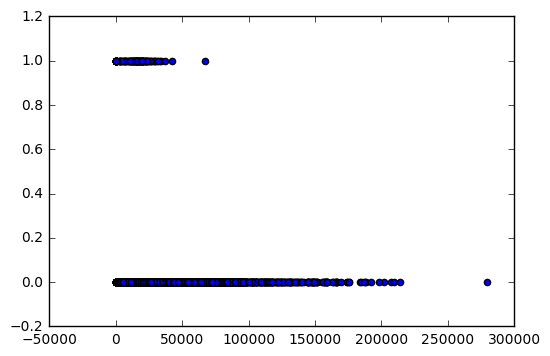

In [332]:
plt.scatter(trainSet_w.Withdrawal,trainSet_w['Facility_Additional services'])

In [326]:
trainSet_w.isnull().values.sum()

0

In [327]:
testSet_w.isnull().sum()

ATM_ID                          0
Balance                         0
Date                            0
ID                              0
Withdrawal                      0
W_mean                          0
W_median                        0
W_max                           0
W_min                           0
Diff1                           0
Diff2                           0
Wid_31                          0
Wid_35                          0
Wid_40                          0
Wid_45                          0
Wid_50                          0
Wid_55                          0
Wid_60                          0
day                             0
month                           0
year                            0
weekday                         0
day_of_year                     0
Facility_Additional services    0
Facility_Only ATM               0
Type_City                       0
Type_Rural                      0
Type_Unknown                    0
pred                            0
dtype: int64

In [300]:
from sklearn import ensemble

rf=ensemble.RandomForestRegressor(n_estimators=60)

In [333]:

rf.fit(X=trainSet_w[[x for x in trainSet_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred', 'Wid_55','Wid_60','r_pred','pred']]],y=trainSet_w['Withdrawal'])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [334]:
testSet_w['pred']=rf.predict(testSet_w[[x for x in testSet_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred', 'Wid_55','Wid_60','r_pred']]])


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [315]:
from sklearn.linear_model import Ridge
model= Ridge()

In [317]:
model.fit(X=trainSet_w[[x for x in trainSet_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred', 'Wid_55','Wid_60','r_pred']]],y=trainSet_w['Withdrawal'])


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [318]:
testSet_w['pred']=model.predict(testSet_w[[x for x in testSet_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred','Wid_55','Wid_60','r_pred']]])
 

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [336]:
testSet_w['pred'] = testSet_w['pred'].clip(0,testSet_w['pred'].max())
#testSet_w['r_pred'] = testSet_w['r_pred'].clip(0,testSet_w['r_pred'].max())


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [337]:
#testSet_w.pred=np.exp(testSet_w.pred)-1
#testSet_w['pred'] = 0.5*testSet_w['pred'] + 0.5*testSet_w['r_pred']
testSet_w['pred'].describe()

count     12912.000000
mean      12420.817162
std       13925.970273
min           0.000000
25%        4833.616667
50%        8568.725000
75%       15102.220833
max      191762.350000
Name: pred, dtype: float64

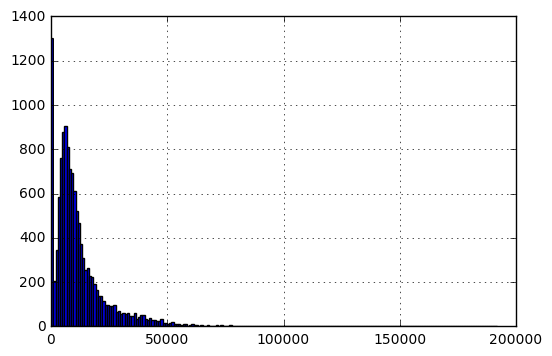

In [338]:
testSet_w['pred'].hist(bins=200)

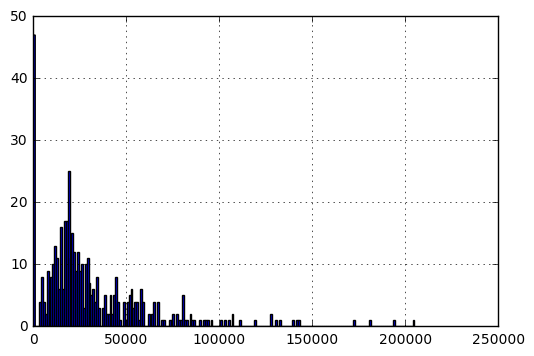

In [46]:
testSet_w.groupby('ATM_ID').Withdrawal.max().hist(bins=200)

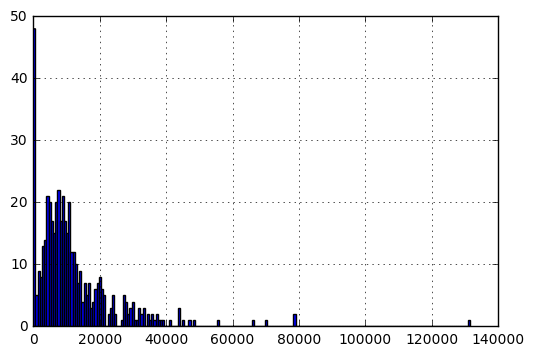

In [35]:
testSet_w.groupby('ATM_ID').Withdrawal.mean().hist(bins=200)

In [339]:
atm_wise_withdrawalSet = testSet_w.groupby('ATM_ID').Withdrawal.agg(['mean','std','max','min']).reset_index()

atm_wise_withdrawalSet.head()


,ATM_ID,mean,std,max,min
0,SRNO00279,11048.333333,4044.417777,18764.0,4967.0
1,SRNO00874,3715.629630,2528.090480,10683.0,316.0
2,SRNO00939,0.000000,0.000000,0.0,0.0
3,SRNO00969,19572.703704,9782.853689,44339.0,3553.0
4,SRNO01212,5548.777778,6417.547820,26014.0,392.0


In [340]:
atm_wise_withdrawalSet.head()

,ATM_ID,mean,std,max,min
0,SRNO00279,11048.333333,4044.417777,18764.0,4967.0
1,SRNO00874,3715.629630,2528.090480,10683.0,316.0
2,SRNO00939,0.000000,0.000000,0.0,0.0
3,SRNO00969,19572.703704,9782.853689,44339.0,3553.0
4,SRNO01212,5548.777778,6417.547820,26014.0,392.0


In [343]:
replenishmentSet_sample = testSet_w.groupby('ATM_ID').agg('count').reset_index()
replenishmentSet_sample = replenishmentSet_sample[['ATM_ID','Balance','Withdrawal']]
replenishmentSet_sample.columns = ['ATM_ID','Replenishment frequency','Replenishment amount']

replenishmentSet_sample['Replenishment frequency'] = np.nan
replenishmentSet_sample['Replenishment amount'] = np.nan
replenishmentSet_sample.head()

,ATM_ID,Replenishment frequency,Replenishment amount
0,SRNO00279,NaN,NaN
1,SRNO00874,NaN,NaN
2,SRNO00939,NaN,NaN
3,SRNO00969,NaN,NaN
4,SRNO01212,NaN,NaN


In [393]:
def amount_mapper(row):
    if atm_wise_withdrawalSet['mean'] > 0:
        return atm_wise_withdrawalSet['mean'] + atm_wise_withdrawalSet['std']
    else:
        return 0

#replenishmentSet_sample['Replenishment amount'] = replenishmentSet_sample.apply(amount_mapper, axis=1)
replenishmentSet_sample['Replenishment amount'] = atm_wise_withdrawalSet['mean'] + 3*atm_wise_withdrawalSet['std']
replenishmentSet_sample['std'] = atm_wise_withdrawalSet['std']

In [394]:
replenishmentSet_sample.describe()

,Replenishment frequency,Replenishment amount,std
count,479.000000,479.000000,479.000000
mean,0.903967,34171.383400,7373.938568
std,0.294945,32110.046325,7108.214374
min,0.000000,0.000000,0.000000
25%,1.000000,14649.333865,3168.842491
50%,1.000000,24359.828544,5206.151150
75%,1.000000,44822.794285,9661.803304
max,1.000000,221545.875498,47873.722775


In [395]:
replenishmentSet_sample['Replenishment frequency'][replenishmentSet_sample['std'] > 0] = 1

replenishmentSet_sample['Replenishment frequency'][replenishmentSet_sample['std'] == 0] = 0

replenishmentSet_sample.head()

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ATM_ID,Replenishment frequency,Replenishment amount,std
0,SRNO00279,1.0,23181.586664,4044.417777
1,SRNO00874,1.0,11299.901068,2528.090480
2,SRNO00939,0.0,0.000000,0.000000
3,SRNO00969,1.0,48921.264770,9782.853689
4,SRNO01212,1.0,24801.421239,6417.547820


In [397]:
testSet_w = testSet_w.merge(replenishmentSet_sample,how='left',on='ATM_ID')
#replenishmentSet_sample.columns  = ['ATM_ID','ATM_ID_count']
testSet_w[['Replenishment frequency', 'Replenishment amount']].describe()

,Replenishment frequency,Replenishment amount
count,12912.000000,12912.000000
mean,0.905437,34226.959534
std,0.292622,32074.186385
min,0.000000,0.000000
25%,1.000000,14656.908892
50%,1.000000,24359.828544
75%,1.000000,45096.279172
max,1.000000,221545.875498


In [398]:
def replenish(x):
    rep_amt = x[0]
    rep_str = x[1]
    weekday = x[2]
    day = x[3]
    if(rep_str==0):
        return 0
    if(rep_str==1):
        return rep_amt
    if((rep_str==2) & (day%2==1)):
        return rep_amt
    if((rep_str==3) & (weekday==1) & (weekday==4)):
        return rep_amt
    if((rep_str==4) & (weekday==4)):
        return rep_amt
    if((rep_str==5) & (weekday==1)):
        return rep_amt
    if((rep_str==6) & (weekday==4) & ((day<=7)) | ((day>=14) & (day<=21))):
        return rep_amt
    else:
        return -1
    
    
        
        
    

testSet_w['Replenishment amount'] = testSet_w[['Replenishment amount','Replenishment frequency','weekday','day']].apply(replenish,axis=1)


In [399]:
3%2==0

False

In [400]:
testSet_w['Replenishment amount'].describe()  

count     12912.000000
mean      34226.959534
std       32074.186385
min           0.000000
25%       14656.908892
50%       24359.828544
75%       45096.279172
max      221545.875498
Name: Replenishment amount, dtype: float64

In [401]:
    
testSet_w['Stock'] = np.nan
testSet_w['Stock'][(testSet_w['Replenishment amount']!=-1)] = testSet_w['Replenishment amount']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']
testSet_w['Stock'][(testSet_w['Replenishment amount']==-1)] = testSet_w['Stock'].shift(-1)-testSet_w['pred']

In [402]:
testSet_w[['ATM_ID','Replenishment amount','day','Replenishment frequency','pred','Withdrawal','Stock',]][1:60]

,ATM_ID,Replenishment amount,day,Replenishment frequency,pred,Withdrawal,Stock
1,SRNO00279,23181.586664,2,1.0,17596.883333,15609.0,NaN
2,SRNO00279,23181.586664,3,1.0,15964.250000,14640.0,NaN
3,SRNO00279,23181.586664,4,1.0,14711.516667,11978.0,NaN
4,SRNO00279,23181.586664,5,1.0,12238.483333,12688.0,NaN
5,SRNO00279,23181.586664,6,1.0,10794.950000,11264.0,NaN
6,SRNO00279,23181.586664,7,1.0,12806.866667,10699.0,NaN
7,SRNO00279,23181.586664,8,1.0,10682.916667,6246.0,NaN
8,SRNO00279,23181.586664,9,1.0,9787.283333,8179.0,NaN
9,SRNO00279,23181.586664,11,1.0,10374.100000,14785.0,NaN
10,SRNO00279,23181.586664,13,1.0,9243.033333,8769.0,NaN


In [403]:
testSet_w['Stock'].describe()

E:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Stock, dtype: float64

In [404]:
testSet_w['Diff'] = testSet_w['Stock'] - testSet_w['Withdrawal']

def cost(a):
    if(a>=0):
         return a*0.15
    else:
         return 1000

testSet_w['Cost'] = testSet_w['Diff'].apply(cost) + (testSet_w['Replenishment amount'][testSet_w['Replenishment amount']!=-1].count() * 300)
testSet_w['Cost'].sum()/10000000

5002.88352

In [371]:
testSet_w['Replenishment amount'][testSet_w['Replenishment amount']!=-1].count() * 300

3873600

In [ ]:
def amount_mapper(row):
    if atm_wise_withdrawal[row['ATM_ID']] > 0:
        return atm_wise_withdrawal[row['ATM_ID']]
    else:
        return 0

replenishment_sample['Replenishment amount'] = replenishment_sample.apply(amount_mapper, axis=1)

In [ ]:
#def frequency_mapper(row):
#    if atm_wise_withdrawal[row['ATM_ID']] > 15727:
#        return 1
#    if atm_wise_withdrawal[row['ATM_ID']] > 9234:
#        return 2
#    if atm_wise_withdrawal[row['ATM_ID']] > 5136:
#        return 5
#    if atm_wise_withdrawal[row['ATM_ID']] > 500:
#        return 6
#    else:
#        return 0

# same for frequency
def frequency_mapper(row):
    if atm_wise_withdrawal[row['ATM_ID']] > 0:
        return 1
    else:
        return 0


replenishment_sample['Replenishment frequency'] = replenishment_sample.apply(frequency_mapper, axis=1)

In [122]:
def rmse(actual,predictions):
    return np.sqrt(np.mean((actual-predictions)**2))

def mae(actual,predictions):
    return np.mean(abs(actual-predictions))


In [405]:
rmse(testSet_w.Withdrawal,testSet_w.pred)

9251.3575665963672

In [406]:
mae(testSet_w.Withdrawal,testSet_w.pred)

5253.026901805403

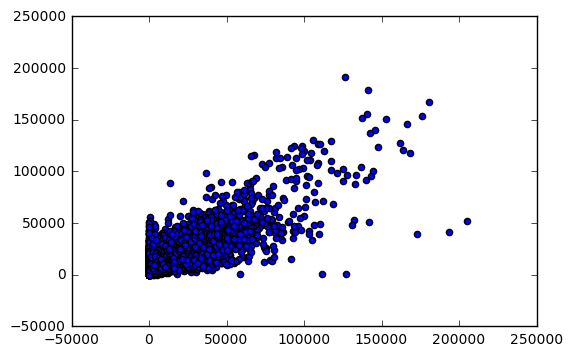

In [407]:
plt.scatter(testSet_w.Withdrawal,testSet_w.pred)

In [432]:
model.fit(X=train_w[[x for x in trainSet_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred', 'Wid_55','Wid_60','r_pred','pred']]],y=train_w['Withdrawal'])


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [409]:
rf.fit(X=train_w[[x for x in train_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred', 'Wid_55','Wid_60','r_pred','pred']]],y=train_w['Withdrawal'])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [433]:
test_w['Withdrawal']=model.predict(test_w[[x for x in test_w.columns if x not in ['ATM_ID','Withdrawal','Date','ID','month','year','day_of_year','W_median','Type_City','Facility_Additional services','pred', 'Wid_55','Wid_60','r_pred','pred']]]) 


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [435]:
test_w['Withdrawal'] = test_w['Withdrawal'].clip(0,test_w['Withdrawal'].max())

test_w.Withdrawal.describe

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<bound method NDFrame.describe of 76108    12030.385099
76109    10268.632662
76110    11451.911446
76111     9387.111545
76112    11982.758931
76113     9739.183833
76114    10703.796703
76115    10016.696827
76116     9753.836045
76117     9200.297297
76118     8202.038586
76119    11663.207977
76120    10979.301717
76121    11501.318983
76122    10843.499018
76123    11075.961304
76124    11077.821634
76125     9257.738051
76126    12803.632245
76127    12906.539142
76128    13056.462445
76129    11859.570521
76130    11820.675805
76131    11120.000630
76132    10960.850062
76133    14170.389461
76134    13503.650131
76135    13883.655213
76136    13187.679629
76137    10429.158564
             ...     
90927     3672.680039
90928     3249.190575
90929     3198.604746
90930     5962.254912
90931     5889.358950
90932     5024.080661
90933     3837.147234
90934     3757.849827
90935     2238.883572
90936     3579.451089
90937     6025.323996
90938     5472.444810
90939     6303.23372

In [438]:
test_w.shape

(14849, 28)

In [439]:
withdrawal_sample.shape

(14849, 4)

In [440]:
withdrawal_sample=test_w[['ID','ATM_ID','Date','Withdrawal']]

In [441]:
withdrawal_sample.columns=['ID','ATM_ID','DATE','WITHDRAWAL']

In [511]:
atm_wise_withdrawal = test_w.groupby('ATM_ID').Withdrawal.agg(['mean','std','max','min']).reset_index()

atm_wise_withdrawal.head()


,ATM_ID,mean,std,max,min
0,SRNO00279,11272.568766,1466.695996,14170.389461,8202.038586
1,SRNO00874,3942.050675,1153.047784,6077.725532,2031.448118
2,SRNO00939,7.350206,40.924216,227.856389,0.000000
3,SRNO00969,17775.379921,2432.236097,22009.024082,9837.711412
4,SRNO01212,4577.102682,1504.257485,7186.654650,1990.622156


In [512]:
atm_wise_withdrawal.describe()


,mean,std,max,min
count,479.000000,479.000000,479.000000,479.000000
mean,12294.042316,1897.988514,15679.286459,7758.510803
std,12534.765635,1263.278343,14388.652023,10387.496459
min,0.000000,0.000000,0.000000,0.000000
25%,5064.708512,1244.351316,7458.777505,1873.826937
50%,9039.828536,1620.637641,12082.898016,4535.497343
75%,15670.221295,2317.637822,19557.598393,9474.031113
max,135525.699628,9713.635907,151247.171672,115065.484620


In [518]:
#atm_wise_withdrawal[atm_wise_withdrawal['mean']>70000]['mean'] = 0
#atm_wise_withdrawal[atm_wise_withdrawal['mean']>70000]['std'] = 0
#atm_wise_withdrawal.loc([atm_wise_withdrawal['mean']>70000,'mean']).replace(0)
atm_wise_withdrawal[atm_wise_withdrawal['mean']>70000] = 0

,ATM_ID,mean,std,max,min


In [519]:

replenishment_sample = test_w.groupby('ATM_ID').agg('count').reset_index()
replenishment_sample = replenishment_sample[['ATM_ID','Balance','Withdrawal']]
replenishment_sample.columns = ['ATM_ID','Replenishment frequency','Replenishment amount']
replenishment_sample['Replenishment frequency'] = np.nan
replenishment_sample['Replenishment amount'] = np.nan
#replenishment_sample['Replenishment amount'] = replenishment_sample.apply(amount_mapper, axis=1)
replenishment_sample['Replenishment amount'] = 1*atm_wise_withdrawal['mean'] + 5*atm_wise_withdrawal['std']
replenishment_sample['std'] = atm_wise_withdrawal['std']
replenishment_sample['Replenishment amount'].describe()

count       479.000000
mean      20748.652674
std       15328.128326
min           0.000000
25%       11299.709165
50%       17153.109780
75%       26564.384181
max      100106.408792
Name: Replenishment amount, dtype: float64

In [520]:
replenishment_sample['Replenishment frequency'][replenishment_sample['std'] > 0] = 1

replenishment_sample['Replenishment frequency'][replenishment_sample['std'] == 0] = 0


E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [521]:
replenishment_sample.describe()

,Replenishment frequency,Replenishment amount,std
count,479.000000,479.000000,479.000000
mean,0.989562,20748.652674,1843.148630
std,0.101740,15328.128326,1195.220119
min,0.000000,0.000000,0.000000
25%,1.000000,11299.709165,1231.572129
50%,1.000000,17153.109780,1599.452675
75%,1.000000,26564.384181,2281.641922
max,1.000000,100106.408792,9713.635907


In [522]:
withdrawal_sample.columns = ['ID', 'ATM_ID', 'DATE', 'WITHDRAWAL']
withdrawal_sample.head()

,ID,ATM_ID,DATE,WITHDRAWAL
76108,SRNO00279_41760,SRNO00279,2014-05-01,12030.385099
76109,SRNO00279_41761,SRNO00279,2014-05-02,10268.632662
76110,SRNO00279_41762,SRNO00279,2014-05-03,11451.911446
76111,SRNO00279_41763,SRNO00279,2014-05-04,9387.111545
76112,SRNO00279_41764,SRNO00279,2014-05-05,11982.758931


In [523]:
replenishment_sample = replenishment_sample[['ATM_ID', 'Replenishment frequency', 'Replenishment amount']]
replenishment_sample.head()

,ATM_ID,Replenishment frequency,Replenishment amount
0,SRNO00279,1.0,18606.048747
1,SRNO00874,1.0,9707.289597
2,SRNO00939,1.0,211.971284
3,SRNO00969,1.0,29936.560404
4,SRNO01212,1.0,12098.390106


In [524]:
withdrawal_sample.to_csv(path+'submission/Withdrawal.csv', index=False)
replenishment_sample.to_csv(path+'submission/Replenishment.csv', index=False)